<a href="https://colab.research.google.com/github/Sriyansh-00/DECISION-TREE-IMPLEMENTATION/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_data.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [2]:
# Convert categorical variables to numerical using Label Encoding
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                   'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(['G1', 'G2', 'G3'], axis=1)  # Drop intermediate grades to predict final grade
y = df['G3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize the decision tree regressor
# Adjust parameters to control tree complexity
dt_regressor = DecisionTreeRegressor(
    max_depth=5,        # Limit tree depth to prevent overfitting
    min_samples_split=20, # Minimum number of samples required to split a node
    min_samples_leaf=10,  # Minimum number of samples required at a leaf node
    random_state=42
)

# Train the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

In [4]:
# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 24.78
Root Mean Squared Error: 4.98
R-squared: -0.21


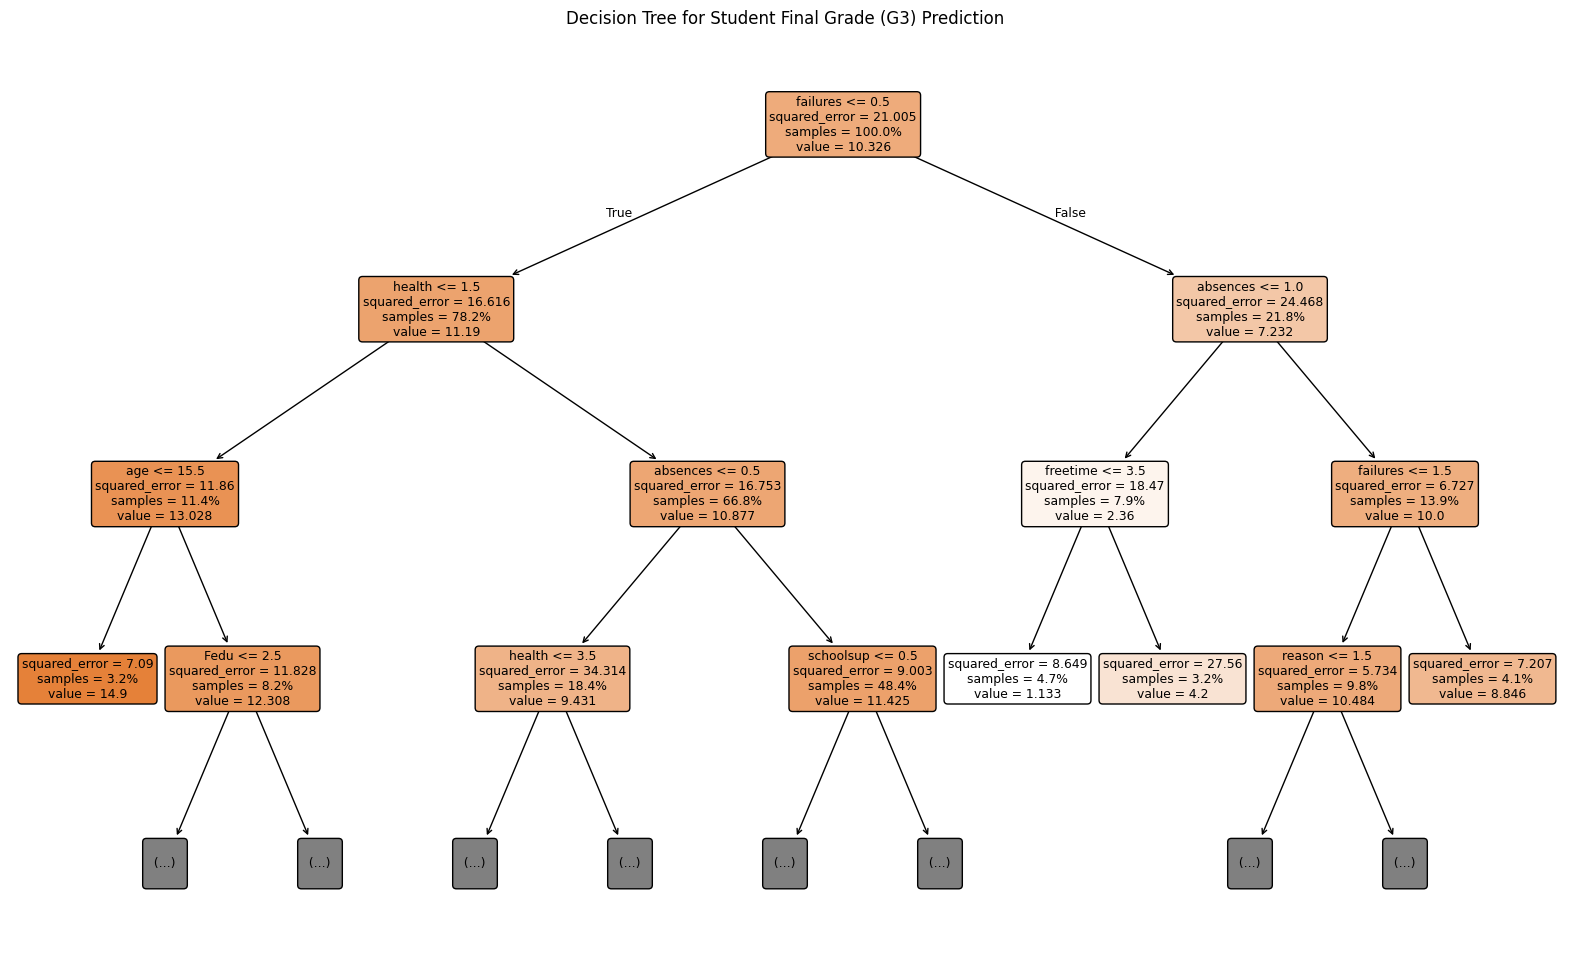

In [5]:
# Set up the figure
plt.figure(figsize=(20,12))

# Plot the decision tree
plot_tree(dt_regressor,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          proportion=True,
          max_depth=3)  # Limit depth for visualization

plt.title("Decision Tree for Student Final Grade (G3) Prediction")
plt.show()

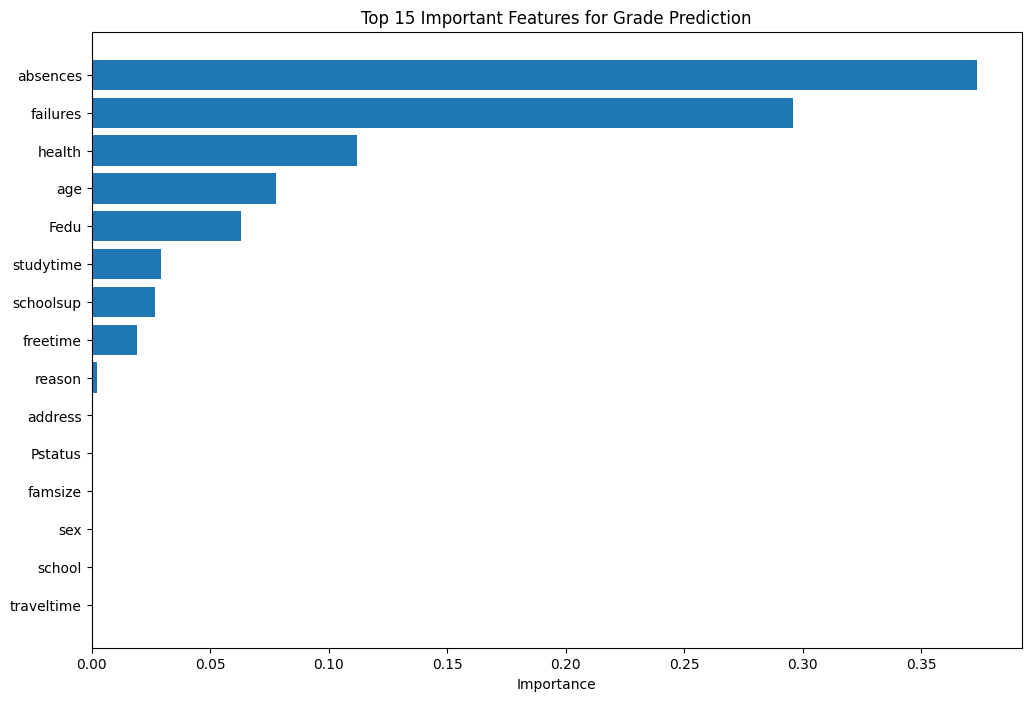

In [6]:
# Get feature importances
importances = dt_regressor.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12,8))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Important Features for Grade Prediction')
plt.gca().invert_yaxis()
plt.show()